In [2]:
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
class LDA:

  def __init__(self, n_dimensions):
    self.n_dimensions = n_dimensions
    self.lin_disc = None

  def fit(self, X, y):
      
    ftrs = X.shape[1]
    cl = np.unique(y)
    total_mean = np.mean(X, axis=0)
    S_w = np.zeros((ftrs, ftrs))
    S_b = np.zeros((ftrs, ftrs))
    for c in cl:
      X_c = X[y == c]
      mean_c = np.mean(X_c, axis=0)
            
      S_w += (X_c - mean_c).T.dot((X_c - mean_c))
      n_c = X_c.shape[0]
      mean_change = (mean_c - total_mean).reshape(ftrs, 1)
      S_b += n_c * (mean_change).dot(mean_change.T)

    A = np.linalg.pinv(S_w).dot(S_b)
    eig_val, eig_vec = np.linalg.eig(A)
    eig_vec = eig_vec.T
    indices = np.argsort(abs(eig_val))[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[indices]
    self.lin_disc = eig_vec[0 : self.n_dimensions]

  def gaussian(self, X):
    means = {}
    covariance = {}
    priors = {}  

    for id, values in X.items():
      project = np.dot(values, self.lin_disc)
      means[id] = np.mean(project, axis=0)
      covariance[id] = np.cov(project, rowvar=False)
      priors[id] = values.shape[0] / self.N

    return means, covariance, priors
  
  def gaussian_distribution(self, x, u, cov):
    scalar = (1. / ((2 * np.pi) ** (x.shape[0] / 2.))) * (1 / np.sqrt(np.linalg.det(cov)))
    x_sub_u = np.subtract(x, u)

    return scalar * np.exp(-np.dot(np.dot(x_sub_u, np.linalg.inv(cov)), x_sub_u.T) / 2.)
    
  def transform(self, X):
    return np.dot(X, self.lin_disc.T)


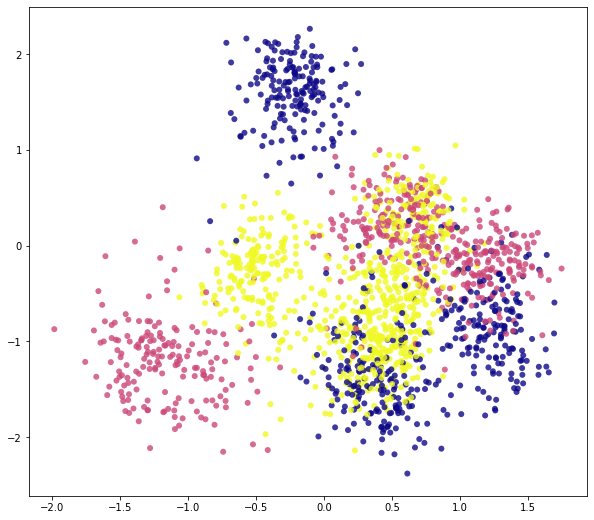

In [5]:
# 2D plot
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_digits()
X, y = data.data, data.target

lda = LDA(2)
lda.fit(X, y)
X_projected = lda.transform(X)

fig = plt.figure(figsize = (10,9))
x1, x2 = X_projected[:, 0], X_projected[:, 1]  

plt.scatter( x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("plasma", 3))

plt.show()

Shape of X: (1797, 64)
Shape of transformed X: (1797, 3)


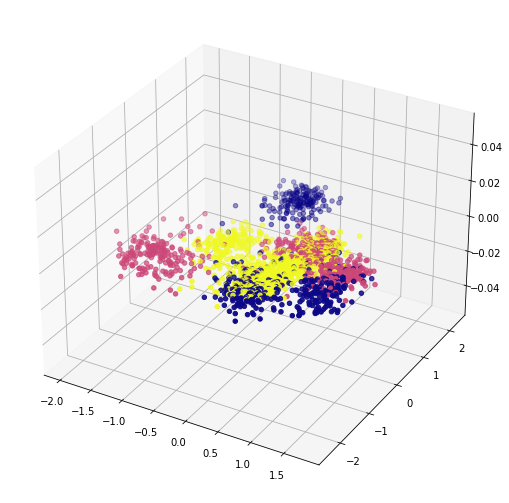

In [6]:
# 3D plot
lda1 = LDA(3)
lda1.fit(X, y)
X_projected = lda1.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1, x2 = X_projected[:, 0], X_projected[:, 1]

fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x1, x2, c=y, cmap=plt.cm.get_cmap("plasma", 3))
plt.show()